In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
#%matplotlib notebook

 # Video i/p 

In [3]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

19089.0

In [4]:
cap.set(cv2.CAP_PROP_POS_FRAMES,15390)

True

In [5]:
#%matplotlib notebook

In [6]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
test = frame.copy()
#print(frame.shape)
#plt.figure(figsize=(10,12))
#plt.imshow(frame)

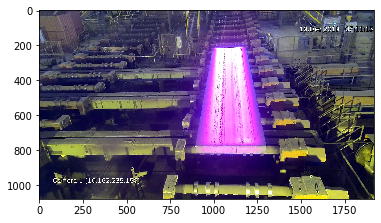

In [7]:
plt.imshow(frame)

In [8]:
#cv2.imwrite("day4_15390_2.jpg",frame)

In [9]:
yuv = cv2.cvtColor(frame.copy(),cv2.COLOR_RGB2YUV)

In [10]:
y,u,vb = cv2.split(yuv)

In [11]:
#%matplotlib notebook

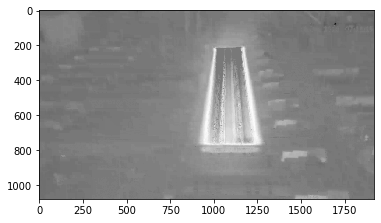

In [12]:
#plt.figure(figsize=(10,12))
plt.imshow(vb,"gray")

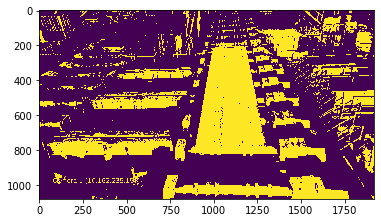

In [13]:
_,ythresh = cv2.threshold(y,102,255,cv2.THRESH_BINARY)
plt.imshow(ythresh)

In [14]:
r,g,b = cv2.split(frame.copy()) 

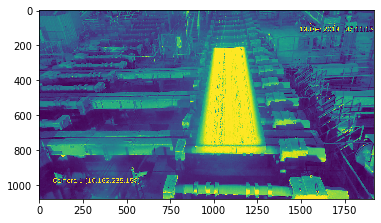

In [15]:
plt.imshow(r)

In [16]:
hsv = cv2.cvtColor(frame.copy(),cv2.COLOR_RGB2HSV)

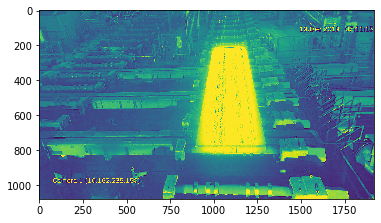

In [17]:
h,s,v = cv2.split(hsv)
plt.imshow(v)

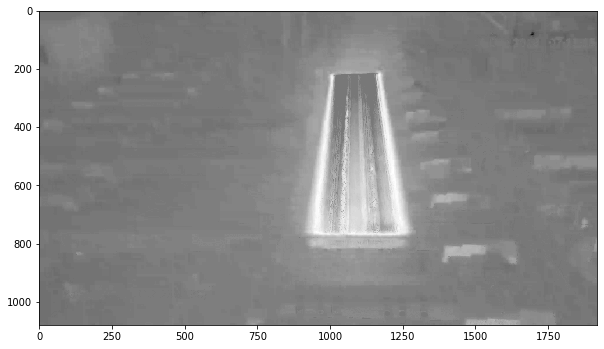

In [18]:
dst = cv2.addWeighted(vb, .5, r, .001, 0.0)
plt.figure(figsize=(10,12))
plt.imshow(dst,"gray")

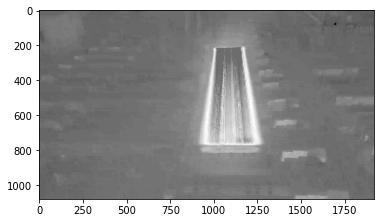

In [19]:
# ycbCr
blur = cv2.GaussianBlur(dst,(5,5),0)
plt.imshow(blur,"gray")

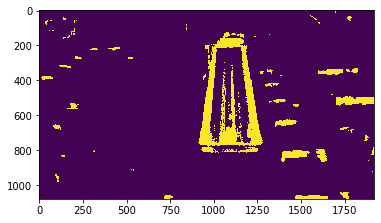

In [20]:
thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-3)
#_,thresh = cv2.threshold(blur,50,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

In [21]:
_ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [22]:
cnts = sorted(contours, key = cv2.contourArea,reverse= True)

In [23]:
blank = np.zeros((thresh.shape),dtype = np.uint8)
ordr = 0
blank = cv2.drawContours(blank,cnts,ordr,(255,255,0),1)

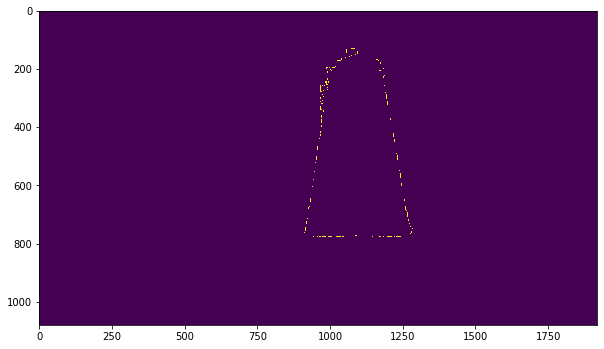

In [24]:
plt.figure(figsize=(10,12))
plt.imshow(blank)

In [25]:
aaaaaaa = np.squeeze(cnts[0])

In [26]:
aaaaaaa[:,0]

array([1074, 1074, 1073, 1058, 1058, 1057, 1056, 1056, 1055, 1054, 1054,
       1053, 1048, 1048, 1047, 1040, 1040, 1039, 1038, 1038, 1037, 1026,
       1026, 1025, 1024, 1024, 1023, 1022, 1022, 1021, 1018, 1018, 1019,
       1020, 1021, 1022, 1022, 1021, 1018, 1018, 1017, 1008, 1007, 1007,
       1002, 1002, 1001,  998,  998, 1001, 1002, 1002, 1005, 1006, 1006,
       1005,  992,  991,  991,  993,  986,  986,  987,  988,  989,  990,
        990,  991,  992,  992,  991,  990,  990,  991,  992,  992,  993,
        994,  994,  995,  996,  996,  995,  995,  994,  994,  993,  992,
        991,  991,  989,  989,  984,  984,  985,  986,  986,  989,  990,
        990,  989,  989,  988,  984,  984,  983,  982,  982,  981,  976,
        975,  975,  974,  973,  973,  972,  972,  971,  966,  966,  967,
        968,  968,  969,  970,  972,  973,  974,  975,  976,  977,  978,
        979,  980,  981,  981,  982,  983,  983,  984,  985,  986,  986,
        989,  990,  990,  991,  992,  992,  990,  9

In [27]:
np.where(aaaaaaa[:,0] == 919+4)

(array([345, 378], dtype=int64),)

In [28]:
aaaaaaa[454]

array([1177,  775], dtype=int32)

In [29]:
from scipy import optimize

In [30]:
#cv2.imwrite("day3_10260_5.jpg",frame)

In [31]:
frame.shape

(1080, 1920, 3)

In [32]:
#%matplotlib notebook

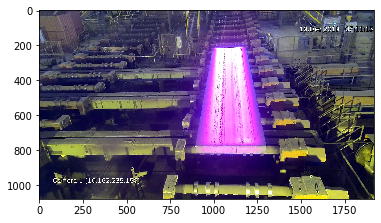

In [33]:
plt.imshow(frame)

In [34]:
alar = [919+4,735,1285-1,735]
blbr = [945,588,1258-1,588-3]
clcr = [961+1,477,1233,477-5]
dldr = [975+2,388,1216,388-5]
eler = [986+2,319,1201+2,319-5]
refPoints = [alar,blbr,clcr,dldr,eler]

In [35]:
np.repeat(345,5)

array([345, 345, 345, 345, 345])

In [36]:
test = np.zeros((500,2))

In [37]:
test[:,0] = np.arange(919-100,919+400)

In [38]:
z=np.nonzero(thresh[735,])

In [39]:
np.count_nonzero(thresh[735,])

272

In [40]:
779 * 4.681

3646.4990000000003

In [41]:
#np.logical_and(cnts[0],test) == [True, True]

In [42]:
#plt.imshow(thresh[735:735+100,])

In [43]:
alar[-2:]

[1284, 735]

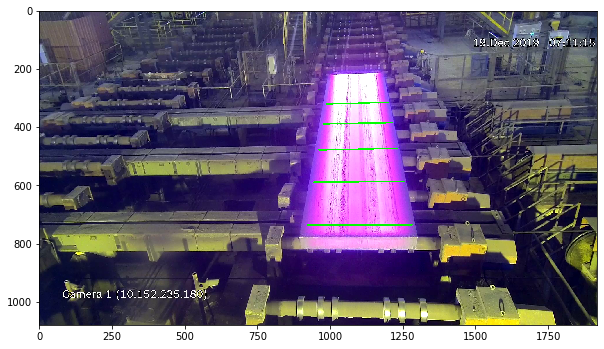

In [44]:
refImage = frame.copy()
for num,i in enumerate (refPoints):
    cv2.line(refImage,(i[0],i[1]),(i[2],i[3]),(0,255,0),3)
    #cv2.putText(refImage,"num",(850,i[1]),2,255,5,cv2.FONT_HERSHEY_SIMPLEX)
plt.figure(figsize=(10,12))
plt.imshow(refImage)

In [65]:
%matplotlib notebook

<IPython.core.display.Javascript object>


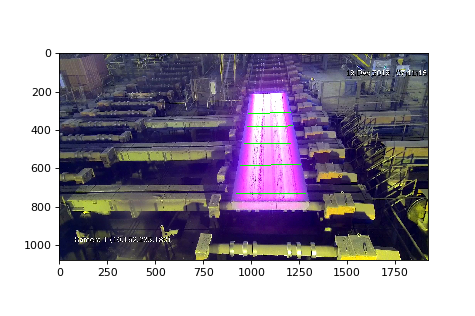

In [66]:
plt.imshow(refImage)

In [47]:
#734 588 480 390 320 
[902,734,1295,734]
[928,588,1264,588]
[948,480,1239,480]
[964,390,1220,390]
[976,320,1206,320]


[976, 320, 1206, 320]

### slab5

In [48]:
red_5_1 = [902,734,1295,734]
red_5_2 = [928,588,1264,588-3]
red_5_3 = [948,480,1239,480-5]
red_5_4 = [964,390,1220,390-5]
red_5_5 = [976,320,1206,320-5]
slab5 = [red_5_1,red_5_2, red_5_3, red_5_4, red_5_5]

### slab4

In [49]:
# day4_1010_1.jpg 
red4_1_1 = [905,734,1298,734]
red4_1_2 = [930,588,1266,588-3]
red4_1_3 = [949,480,1243,480-5]
red4_1_4 = [965,390,1224,390-5]
red4_1_5 = [977,320,1207,320-5]
slab4 = [red4_1_1,red4_1_2,red4_1_3,red4_1_4,red4_1_5]

### slab 3

In [50]:
# day3_7710_3.jpg
red_3_1 = [887,734,1304,734]
red_3_2 = [915,588,1273,588-3]
red_3_3 = [935,480,1249,480-5]
red_3_4 = [951,390,1231,390-5]
red_3_5 = [964,320,1216,320-5]
slab3 = [red_3_1,red_3_2,red_3_3,red_3_4,red_3_5]

### slab 2

In [51]:
# day3_13710_2.jpg # original
red_2_1 = [886,738,1305,738]
red_2_2 = [913,590,1275,590-3]
red_2_3 = [933,480,1252,480-5]
red_2_4 = [951,390,1232,390-5]
red_2_5 = [964,320,1217,320-5]
slab2 = [red_2_1,red_2_2,red_2_3,red_2_4,red_2_5]

In [52]:
# day3_13710_2.jpg # height matched
red_2_1 = [886,734,1305,734]
red_2_2 = [913,588,1275,588-3]
red_2_3 = [933,480,1252,480-5]
red_2_4 = [951,390,1232,390-5]
red_2_5 = [964,320,1217,320-5]
slab2 = [red_2_1,red_2_2,red_2_3,red_2_4,red_2_5]

### slab 1

In [53]:
# day3_700_1.jpg
red1 = [886,734,1307,734]
red2 = [912,588,1275,588-3]
red3 = [935,480,1254-2,480-5]
red4 = [951,390,1233-1,390-5]
red5 = [964,320,1219-1,320-5]
slab1 = [red1,red2,red3,red4,red5]

# pixels Per Metric

In [54]:
slabNumber = slab5

In [55]:
drawLine = frame.copy()
for i in range(5):
    dB = dist.euclidean(refPoints[i][:2],refPoints[i][-2:])
    pixelsPerMetric = dB / 1690
    print(1/pixelsPerMetric,"<<<<<-----------------")
    
    dB1 = dist.euclidean(slabNumber[i][:2],slabNumber[i][-2:])
    cv2.line(drawLine,(slabNumber[i][0],slabNumber[i][1]),(slabNumber[i][2],slabNumber[i][3]),0,5)
    print(slabNumber[i][0],slabNumber[i][2],"=" ,slabNumber[i][2]-slabNumber[i][0],"<-----Number of Pixels coverd")
    #print(slabNumber[i][0],slabNumber[i][2])
    
    #refImage = cv2.circle(drawLine, (slabNumber[i][0],slabNumber[i][1]), 1, 0, 5)
    #refImage = cv2.circle(drawLine, (slabNumber[i][2],slabNumber[i][3]), 1, 0, 5)
    
    dimB = dB1 / pixelsPerMetric
    print(dimB,"MM\t \t approx ERROR =", dimB - 1735,"\n")
    
    

4.6814404432132966 <<<<<-----------------
902 1295 = 393 <-----Number of Pixels coverd
1839.8060941828255 MM	 	 approx ERROR = 104.80609418282552 

5.416416283387513 <<<<<-----------------
928 1264 = 336 <-----Number of Pixels coverd
1819.988411062035 MM	 	 approx ERROR = 84.98841106203508 

6.235101208678164 <<<<<-----------------
948 1239 = 291 <-----Number of Pixels coverd
1814.6822627685676 MM	 	 approx ERROR = 79.68226276856763 

7.069582813358683 <<<<<-----------------
964 1220 = 256 <-----Number of Pixels coverd
1810.1583617790986 MM	 	 approx ERROR = 75.15836177909864 

7.858340379082183 <<<<<-----------------
976 1206 = 230 <-----Number of Pixels coverd
1807.8453204582252 MM	 	 approx ERROR = 72.84532045822516 



In [56]:
(886-1307) * 4.68

-1970.28

In [57]:
for i in range(5):
    print(slab2[i][0]-slab2[i][2])

-419
-362
-319
-281
-253


In [58]:
#%matplotlib notebook

<IPython.core.display.Javascript object>


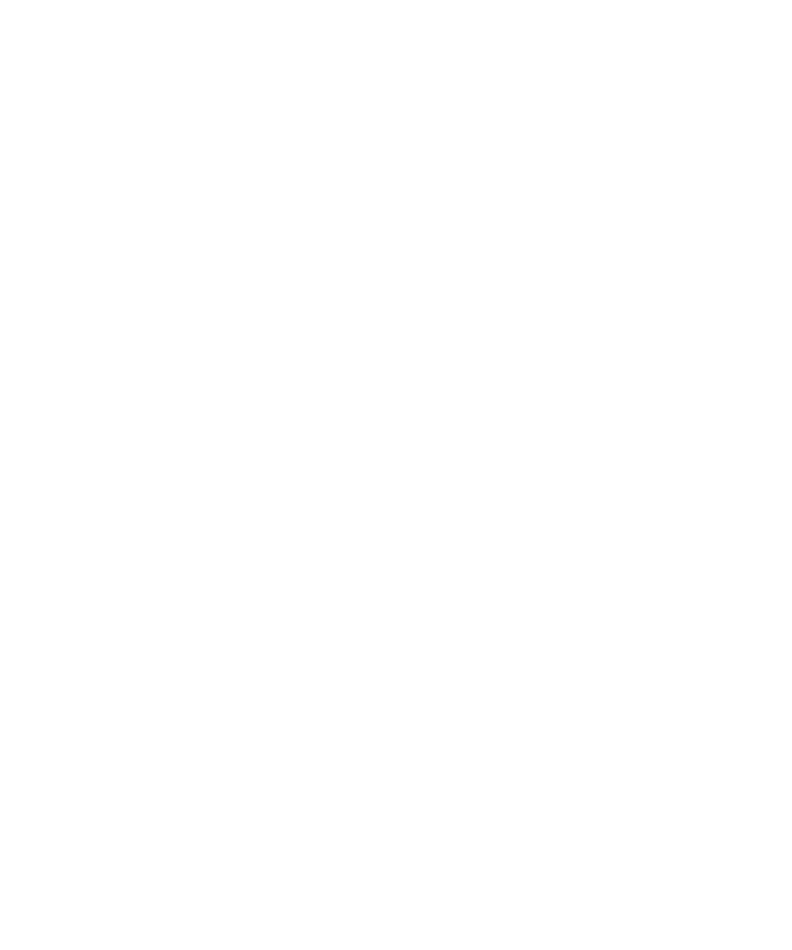

<IPython.core.display.Javascript object>


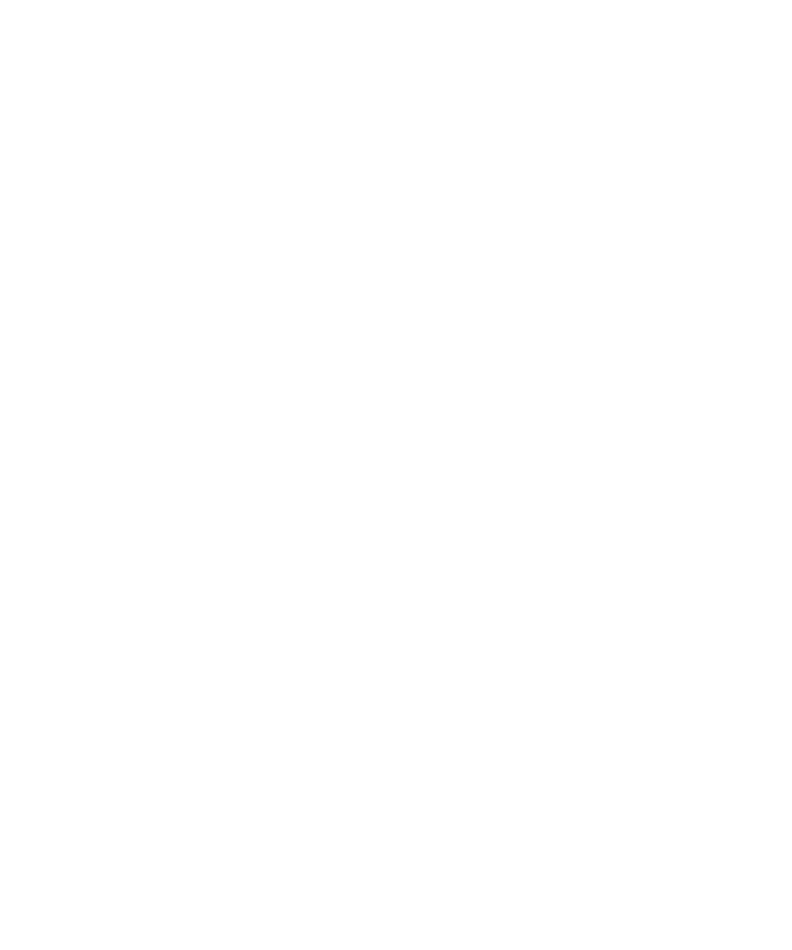

In [59]:
font = cv2.FONT_HERSHEY_SIMPLEX
plt.figure(figsize=(10,12))
drawLine = cv2.putText(drawLine.copy(),"Width -> 1952.1606648199447 mm".format(),(0,120), font, 1.82, (255,255,255), 7, cv2.LINE_AA)
plt.imshow(drawLine)

In [60]:
drawLine = cv2.cvtColor(drawLine,cv2.COLOR_RGB2BGR)
cv2.imwrite("C:/Users/shrin/Documents/Abhilash/report/day3_width.jpg",drawLine)

False

<IPython.core.display.Javascript object>


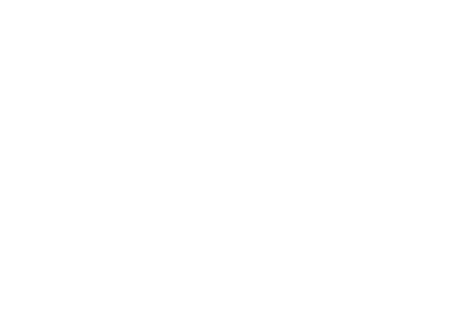

<IPython.core.display.Javascript object>


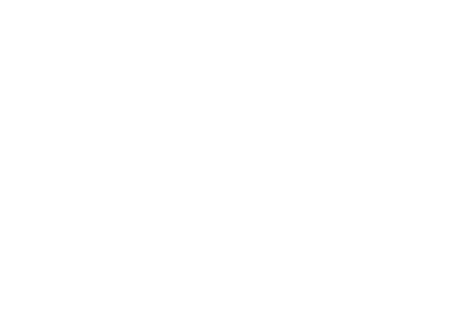

In [61]:
plt.imshow(drawLine)

<IPython.core.display.Javascript object>


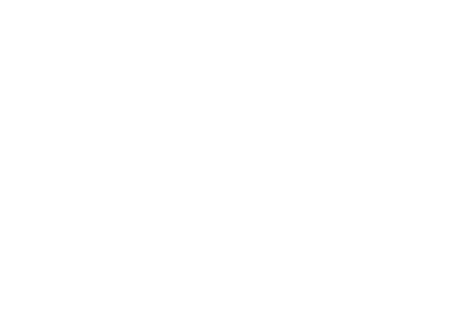

<IPython.core.display.Javascript object>


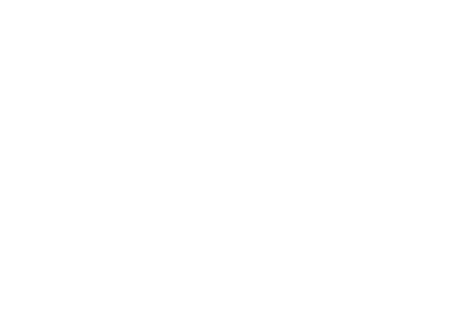

In [62]:
plt.imshow(refImage)

In [63]:
1134/9

126.0

In [64]:
slab 5

4.6814404432132966 <<<<<-----------------
902 1295 = 393 <-----Number of Pixels coverd
1839.8060941828255 MM	 	 approx ERROR = 104.80609418282552 

5.416416283387513 <<<<<-----------------
928 1264 = 336 <-----Number of Pixels coverd
1819.988411062035 MM	 	 approx ERROR = 84.98841106203508 

6.235101208678164 <<<<<-----------------
948 1239 = 291 <-----Number of Pixels coverd
1814.6822627685676 MM	 	 approx ERROR = 79.68226276856763 

7.069582813358683 <<<<<-----------------
964 1220 = 256 <-----Number of Pixels coverd
1810.1583617790986 MM	 	 approx ERROR = 75.15836177909864 

7.858340379082183 <<<<<-----------------
976 1206 = 230 <-----Number of Pixels coverd
1807.8453204582252 MM	 	 approx ERROR = 72.84532045822516 


SyntaxError: invalid syntax (<ipython-input-64-82530d409bee>, line 1)

In [ ]:
slab 4

4.6814404432132966 <<<<<-----------------
905 1298 = 393 <-----Number of Pixels coverd
1839.8060941828255 MM	 	 approx ERROR = 104.80609418282552 

5.416416283387513 <<<<<-----------------
930 1266 = 336 <-----Number of Pixels coverd
1819.988411062035 MM	 	 approx ERROR = 84.98841106203508 

6.235101208678164 <<<<<-----------------
949 1243 = 294 <-----Number of Pixels coverd
1833.3848340260058 MM	 	 approx ERROR = 98.38483402600582 

7.069582813358683 <<<<<-----------------
965 1224 = 259 <-----Number of Pixels coverd
1831.3631129579865 MM	 	 approx ERROR = 96.36311295798646 

7.858340379082183 <<<<<-----------------
977 1207 = 230 <-----Number of Pixels coverd
1807.8453204582252 MM	 	 approx ERROR = 72.84532045822516 

In [ ]:
slab 3 

4.6814404432132966 <<<<<-----------------
887 1304 = 417 <-----Number of Pixels coverd
1952.1606648199447 MM	 	 approx ERROR = 102.16066481994471 

5.416416283387513 <<<<<-----------------
915 1273 = 358 <-----Number of Pixels coverd
1939.145111702427 MM	 	 approx ERROR = 89.1451117024269 

6.235101208678164 <<<<<-----------------
935 1249 = 314 <-----Number of Pixels coverd
1958.0699764204744 MM	 	 approx ERROR = 108.0699764204744 

7.069582813358683 <<<<<-----------------
951 1231 = 280 <-----Number of Pixels coverd
1979.7987689600914 MM	 	 approx ERROR = 129.79876896009137  

7.858340379082183 <<<<<-----------------
964 1216 = 252 <-----Number of Pixels coverd
1980.691535802584 MM	 	 approx ERROR = 130.69153580258399 

In [ ]:
slab 2

4.6814404432132966 <<<<<-----------------
886 1305 = 419 <-----Number of Pixels coverd
1961.5235457063714 MM	 	 approx ERROR = 111.52354570637135 

5.416416283387513 <<<<<-----------------
913 1275 = 362 <-----Number of Pixels coverd
1960.8100245719015 MM	 	 approx ERROR = 110.81002457190152 

6.235101208678164 <<<<<-----------------
933 1252 = 319 <-----Number of Pixels coverd
1989.241592711972 MM	 	 approx ERROR = 139.2415927119721 

7.069582813358683 <<<<<-----------------
951 1232 = 281 <-----Number of Pixels coverd
1986.8672288866746 MM	 	 approx ERROR = 136.86722888667464 

7.858340379082183 <<<<<-----------------
964 1217 = 253 <-----Number of Pixels coverd
1988.5483359285797 MM	 	 approx ERROR = 138.54833592857972 


"""------------------------------------------- Height Matched -----------------------------------------------------"""

4.6814404432132966 <<<<<-----------------
886 1305 = 419 <-----Number of Pixels coverd
1961.5235457063714 MM	 	 approx ERROR = 111.52354570637135 

5.416416283387513 <<<<<-----------------
913 1275 = 362 <-----Number of Pixels coverd
1960.8100245719015 MM	 	 approx ERROR = 110.81002457190152 

6.235101208678164 <<<<<-----------------
933 1252 = 319 <-----Number of Pixels coverd
1989.241592711972 MM	 	 approx ERROR = 139.2415927119721 

7.069582813358683 <<<<<-----------------
951 1232 = 281 <-----Number of Pixels coverd
1986.8672288866746 MM	 	 approx ERROR = 136.86722888667464 

7.858340379082183 <<<<<-----------------
964 1217 = 253 <-----Number of Pixels coverd
1988.5483359285797 MM	 	 approx ERROR = 138.54833592857972 

In [ ]:
slab 1

4.6814404432132966 <<<<<-----------------
886 1307 = 421 <-----Number of Pixels coverd
1970.886426592798 MM	 	 approx ERROR = 120.88642659279799 

5.416416283387513 <<<<<-----------------
912 1275 = 363 <-----Number of Pixels coverd
1966.2262553795774 MM	 	 approx ERROR = 116.22625537957742 

6.235101208678164 <<<<<-----------------
935 1252 = 317 <-----Number of Pixels coverd
1976.77293147351 MM	 	 approx ERROR = 126.77293147350997 

7.069582813358683 <<<<<-----------------
951 1232 = 281 <-----Number of Pixels coverd
1986.8672288866746 MM	 	 approx ERROR = 136.86722888667464 

7.858340379082183 <<<<<-----------------
964 1218 = 254 <-----Number of Pixels coverd
1996.4051481790152 MM	 	 approx ERROR = 146.4051481790152 